In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import scipy.stats as stats




In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:

dfaustincal = pd.read_csv('/content/gdrive/MyDrive/AUSTIN/calendar.csv')
dfaustincal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2022-06-09,f,$95.00,$95.00,2.0,90.0
1,5456,2022-06-10,f,$150.00,$150.00,2.0,90.0
2,5456,2022-06-11,f,$150.00,$150.00,2.0,90.0
3,5456,2022-06-12,f,$95.00,$95.00,2.0,90.0
4,5456,2022-06-13,f,$95.00,$95.00,2.0,90.0


##Data Preparation

In [ ]:
#listings dataframe
dfauslistings = pd.read_csv('/content/gdrive/MyDrive/AUSTIN/listings.csv')
dfauslistings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220608163127,2022-06-09,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.72
1,5769,https://www.airbnb.com/rooms/5769,20220608163127,2022-06-08,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.78
2,6413,https://www.airbnb.com/rooms/6413,20220608163127,2022-06-09,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.98,4.86,4.94,NaN,f,1,1,0,0,0.78
3,6448,https://www.airbnb.com/rooms/6448,20220608163127,2022-06-09,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.12
4,341382,https://www.airbnb.com/rooms/341382,20220608163127,2022-06-09,SXSW | 4 bedroom home near Downtown,"The house is comfortable, homey, and so full o...","We are located in laid-back, fun East Austin, ...",https://a0.muscache.com/pictures/fa98c11d-15e8...,1205884,https://www.airbnb.com/users/show/1205884,...,4.88,4.39,4.53,NaN,f,1,1,0,0,0.99


In [ ]:
# reviews dataframe
dfausreviews = pd.read_csv('/content/gdrive/MyDrive/AUSTIN/reviews-2.csv')
dfausreviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...
2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...
3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...
4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ..."


In [ ]:

print("rows and columns of dataset", dfaustincal.shape)
print(dfaustincal.isnull().sum())
print(dfaustincal.describe(include='all'))




rows and columns of dataset (6229497, 7)
listing_id           0
date                 0
available            0
price              566
adjusted_price     566
minimum_nights    2134
maximum_nights    2134
dtype: int64
          listing_id        date available    price adjusted_price  \
count   6.229497e+06     6229497   6229497  6228931        6228931   
unique           NaN         366         2     4666           4678   
top              NaN  2023-05-30         f  $150.00        $150.00   
freq             NaN       17070   3363711   146732         143434   
mean    1.046985e+17         NaN       NaN      NaN            NaN   
std     2.264724e+17         NaN       NaN      NaN            NaN   
min     5.456000e+03         NaN       NaN      NaN            NaN   
25%     2.294327e+07         NaN       NaN      NaN            NaN   
50%     4.363939e+07         NaN       NaN      NaN            NaN   
75%     5.275607e+07         NaN       NaN      NaN            NaN   
max     6.44193

In [ ]:

print("rows and columns of dataset ", dfauslistings.shape)
print(dfauslistings.isnull().sum())

dfauslistings

rows and columns of dataset  (17071, 74)
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3292
Length: 74, dtype: int64


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220608163127,2022-06-09,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.72
1,5769,https://www.airbnb.com/rooms/5769,20220608163127,2022-06-08,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.78
2,6413,https://www.airbnb.com/rooms/6413,20220608163127,2022-06-09,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.98,4.86,4.94,NaN,f,1,1,0,0,0.78
3,6448,https://www.airbnb.com/rooms/6448,20220608163127,2022-06-09,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.12
4,341382,https://www.airbnb.com/rooms/341382,20220608163127,2022-06-09,SXSW | 4 bedroom home near Downtown,"The house is comfortable, homey, and so full o...","We are located in laid-back, fun East Austin, ...",https://a0.muscache.com/pictures/fa98c11d-15e8...,1205884,https://www.airbnb.com/users/show/1205884,...,4.88,4.39,4.53,NaN,f,1,1,0,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17066,539731600041129313,https://www.airbnb.com/rooms/539731600041129313,20220608163127,2022-06-08,Centrally located home in cozy neighborhood,Pie Capitol of Texas & best kept secret of the...,Quiet neighborhood with community park nearby,https://a0.muscache.com/pictures/c1677cc2-7348...,439978004,https://www.airbnb.com/users/show/439978004,...,4.85,4.77,4.62,NaN,t,1,1,0,0,3.10
17067,586910439366221002,https://www.airbnb.com/rooms/586910439366221002,20220608163127,2022-06-08,Cheerful Country Ranch property with four bedr...,Forget your worries in this spacious and seren...,NaN,https://a0.muscache.com/pictures/b128457d-c69a...,256520767,https://www.airbnb.com/users/show/256520767,...,4.95,5.00,5.00,NaN,f,1,1,0,0,7.92
17068,602333588642466890,https://www.airbnb.com/rooms/602333588642466890,20220608163127,2022-06-08,Cozy Master bedroom North Austin,Cozy master bedroom with private bathroom in ...,NaN,https://a0.muscache.com/pictures/a0af7ee8-100e...,84104364,https://www.airbnb.com/users/show/84104364,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
17069,41819463,https://www.airbnb.com/rooms/41819463,20220608163127,2022-06-08,Happy House at Blanco Rapids Ranch,We are close to Wimberley and Canyon Lake on t...,This ranch is in the former Boy Scout Ranch on...,https://a0.muscache.com/pictures/a1c7a6d2-fa4a...,79504097,https://www.airbnb.com/users/show/79504097,...,4.97,4.98,4.87,NaN,t,5,5,0,0,4.39


In [ ]:
print("rows and columns of dataset ", dfausreviews.shape)



rows and columns of dataset  (605983, 6)


#From Peoples Perspective, How frequently Host Respond?

Text(0.5, 1.0, 'Host Response Time')

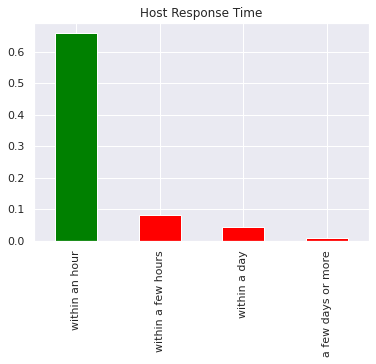

In [ ]:

hostresp=dfauslistings['host_response_time'].dropna().value_counts()

(hostresp/dfauslistings.shape[0]).plot(kind="bar", color=['green', 'red', 'red', 'red'])

plt.title("Host Response Time")

In [ ]:

dfauslistings['host_response_time'].dropna()

0        within a few hours
1              within a day
2        within a few hours
3            within an hour
5              within a day
                ...        
17066        within an hour
17067    within a few hours
17068        within an hour
17069        within an hour
17070        within an hour
Name: host_response_time, Length: 13511, dtype: object

#What are the various properties available and their frequency?

Text(0.5, 1.0, 'Property Type')

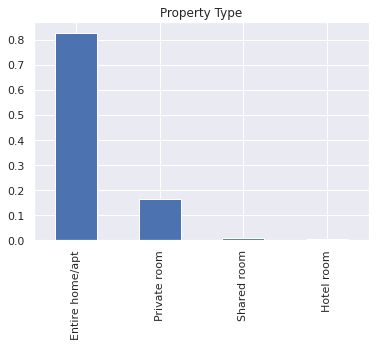

In [ ]:
propertytype = dfauslistings['room_type'].value_counts()
(propertytype/dfauslistings.shape[0]).plot(kind="bar")
plt.title("Property Type")

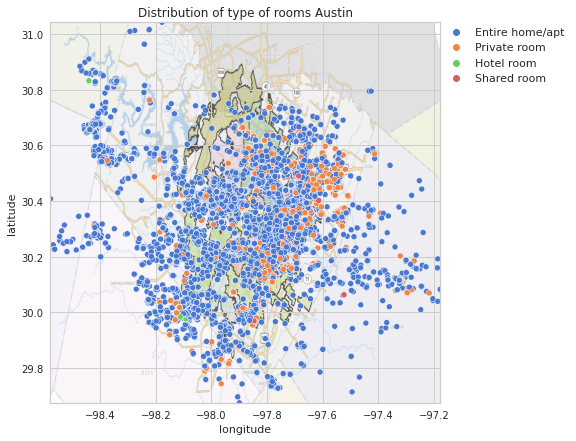

In [ ]:
from imageio import imread
plt.figure(figsize=(10,7))
img=imread('/content/gdrive/MyDrive/AUSTIN/city-council-districts.png')
import seaborn as sns
plt.imshow(img,zorder=0,extent=[dfauslistings['longitude'].min(),dfauslistings['longitude'].max(),dfauslistings['latitude'].min(),dfauslistings['latitude'].max()])
ax = plt.gca()

sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=dfauslistings.longitude, y=dfauslistings.latitude,hue=dfauslistings.room_type,palette='muted')
ax.set_title('Distribution of type of rooms Austin')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [ ]:
from collections import defaultdict
from collections import OrderedDict


#Most Available Amenities

In [ ]:
A_dict = defaultdict(int)

amenities = dfauslistings["amenities"].apply(lambda row: row[1:-1])
amenities = amenities.str.split(",")

for idx in range(len(dfauslistings)):
    for amenity in amenities.loc[idx]:
        A_dict[amenity] +=1

amenities_sorted = OrderedDict(sorted(A_dict.items(), \
                               key=lambda x: x[1], reverse=True))

amenities_tally = pd.DataFrame.from_dict(amenities_sorted, \
                                         orient="index")
amenities_tally.columns = ["Count of Amenity"]
amenities_tally["Percent"] = (amenities_tally["Count of Amenity"] \
                                  / len(dfauslistings))*100

print("Number of amenities available: %d" \
      % len(amenities_tally))
display(amenities_tally.head(10))

Number of amenities available: 3783


,Count of Amenity,Percent
"""Wifi""",15635,91.588073
"""Smoke alarm""",15523,90.931990
"""Kitchen""",15271,89.455802
"""Essentials""",15110,88.512682
"""Long term stays allowed""",13985,81.922559
"""Free parking on premises""",13402,78.507410
"""Air conditioning""",13400,78.495694
"""Shampoo""",12370,72.462070
"""Heating""",12346,72.321481
"""Fire extinguisher""",12194,71.431082


#Booking Frequency till June 2023

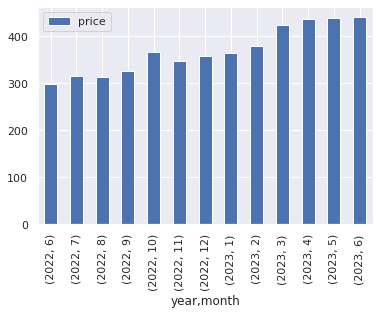

In [ ]:

dfaustincal['year'] = pd.DatetimeIndex(dfaustincal['date']).year
dfaustincal['month'] = pd.DatetimeIndex(dfaustincal['date']).month

# float and removing $
dfaustincal['price'] = dfaustincal['price'].replace('[\$,]', '', regex=True).astype(float)

dfaustincal.groupby(['year','month'])[['price']].mean().plot(kind="bar")






#Getting Data from zip codes for areas and using it for our dataframe to get a better understanding

In [ ]:
ziparea= pd.read_csv('/content/gdrive/MyDrive/AUSTIN/csvData.csv')
ziparea

,zip,city,county,pop
0,77449,Katy,Harris,128294
1,77494,Katy,Fort Bend,118291
2,79936,El Paso,El Paso,111620
3,75034,Frisco,Collin,108525
4,77084,Houston,Harris,107673
...,...,...,...,...
1925,79051,Kerrick,Dallam,0
1926,79058,Masterson,Moore,0
1927,79105,Amarillo,Potter,0
1928,79759,Notrees,Ector,0


                                       price
neighbourhood                               
Cypress Mill, Texas, United States    2857.0
Burnet County, Texas, United States   1022.0
Rollingwood, Texas, United States      995.0
Lake Travis, Texas, United States      915.0
Spicewood , Texas, United States       850.0
...                                      ...
Lott TX, Texas, United States           85.0
Seguin, Texas, United States            77.0
Bastrop County, Texas, United States    75.0
Andice, Texas, United States            62.5
Webberville, Texas, United States       50.0

[98 rows x 1 columns]
Austin, Texas, United States               7169
Wimberley, Texas, United States             270
Dripping Springs, Texas, United States      221
Round Rock, Texas, United States            187
Lago Vista, Texas, United States            180
                                           ... 
Cypress Mill, Texas, United States            1
point venture, Texas, United States           1
Canyon L

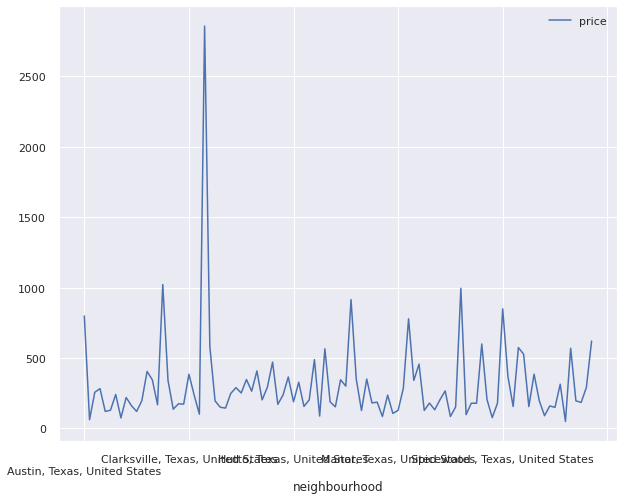

In [ ]:
dfauslistings['price'] = dfauslistings['price'].replace('[\$,]', '', regex=True).astype(float)

print(dfauslistings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False))
dfauslistings.groupby(['neighbourhood'])[['price']].mean().plot()
print(dfauslistings.neighbourhood.value_counts())

In [ ]:
# average price by neighborhood


dfauslistings['price'] = dfauslistings['price'].replace('[\$,]', '', regex=True).astype(float)

y=dfauslistings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
y.rename(columns = {'neighbourhood_cleansed':'zip'}, inplace = True)




#Most expensive Areas and Least Expensive Areas to book an Airbnb in Austin

                                      price
neighbourhood                              
Cypress Mill, Texas, United States   2857.0
Burnet County, Texas, United States  1022.0
Rollingwood, Texas, United States     995.0
Lake Travis, Texas, United States     915.0
Spicewood , Texas, United States      850.0


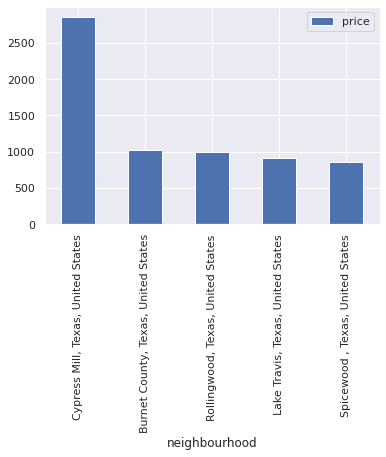

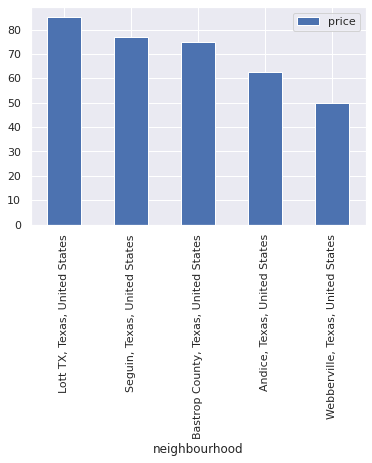

In [ ]:


toplocal3=dfauslistings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).head()
print(toplocal3)
toplocal3.plot(kind='bar')

taillocal=dfauslistings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).tail()
taillocal.plot(kind='bar');

In [ ]:
neigh = ('Cypress Mill, Texas, United States','Burnet County, Texas, United States','Rollingwood, Texas, United States','Lake Travis, Texas, United States','Spicewood , Texas, United States')
prop = ('Entire home/apt','Private room')
df_1 = dfauslistings.loc[dfauslistings['neighbourhood'].isin(neigh)]
df_2 = df_1.loc[dfauslistings['room_type'].isin(prop)]

df_prop = df_2.groupby(['neighbourhood','room_type'])[['price']].mean().reset_index()
df_prop





,neighbourhood,room_type,price
0,"Burnet County, Texas, United States",Entire home/apt,1022.0
1,"Cypress Mill, Texas, United States",Entire home/apt,2857.0
2,"Lake Travis, Texas, United States",Entire home/apt,915.0
3,"Rollingwood, Texas, United States",Private room,995.0
4,"Spicewood , Texas, United States",Entire home/apt,850.0


In [ ]:
comments = dfausreviews[['listing_id', 'comments']]
print(comments.head())



   listing_id                                           comments
0        5456  Sylvia is a hostess who is gracious and helpfu...
1        5456  Highly recommended. Sylvia was extremely helpf...
2        5456  A great place to stay in a great city. Sylvia ...
3        5456  Highly recommended! \r<br/>Cute and cozy guest...
4        5456  What a great little apartment!  It was clean, ...


In [ ]:

def get_neigh(listing_id):
    
    neighbourhood = dfauslistings.loc[dfauslistings['id'] == listing_id, 'neighbourhood']
    return neighbourhood

# Test function
get_neigh(21126)


12    Austin, Texas, United States
Name: neighbourhood, dtype: object

In [ ]:
y=comments.merge(dfauslistings,left_on='listing_id',right_on='id')


In [ ]:
y

y=y[['listing_id','comments','neighbourhood']]

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Analyzing Reviews of Airbnb Listings using Sentiment Analyzer

In [ ]:
def sentimentanalyzerscores(sentene):
   
    sentene = str(sentene)
    score = analyser.polarity_scores(sentene)
    return score['compound']




In [ ]:
y['polarity_score'] = y['comments'].apply(sentimentanalyzerscores)
y.head(20)

,listing_id,comments,neighbourhood,polarity_score
0,5456,Sylvia is a hostess who is gracious and helpfu...,"Austin, Texas, United States",0.9589
1,5456,Highly recommended. Sylvia was extremely helpf...,"Austin, Texas, United States",0.8432
2,5456,A great place to stay in a great city. Sylvia ...,"Austin, Texas, United States",0.9705
3,5456,Highly recommended! \r<br/>Cute and cozy guest...,"Austin, Texas, United States",0.5042
4,5456,"What a great little apartment! It was clean, ...","Austin, Texas, United States",0.9787
5,5456,"Sylvia was great; ""ditto"" to all the previous ...","Austin, Texas, United States",0.9468
6,5456,Sylvia and her cute apartment we absolutely wo...,"Austin, Texas, United States",0.9824
7,5456,Sylvia is the best! Her guest house was charmi...,"Austin, Texas, United States",0.9831
8,5456,Sylvia is great person and great host. She pic...,"Austin, Texas, United States",0.9359
9,5456,She's a special woman and our stay was wonderf...,"Austin, Texas, United States",0.8625


In [ ]:
y=y.dropna()


In [ ]:

print('Positive scores: ',y['polarity_score'][y['polarity_score'] > 0].count())
print('Negative  scores: ',y['polarity_score'][y['polarity_score'] < 0].count())
print('Neutral  scores: ',y['polarity_score'][y['polarity_score'] == 0].count())

Positive scores:  487672
Negative  scores:  4983
Neutral  scores:  8342


In [ ]:
neigh_polarity = y.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

#Most Popular Neighborhoods and least popular neighborhoods

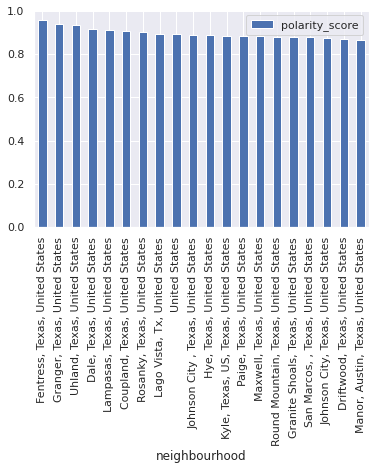

In [ ]:
neigh_polarity.head(20).plot(kind='bar');


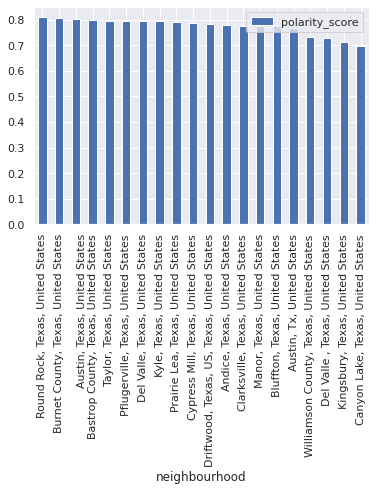

In [ ]:
neigh_polarity.tail(20).plot(kind='bar');

In [ ]:
neigh_polarity

,polarity_score
neighbourhood,
"Fentress, Texas, United States",0.957957
"Granger, Texas, United States",0.940714
"Uhland, Texas, United States",0.934300
"Dale, Texas, United States",0.913875
"Lampasas, Texas, United States",0.911314
...,...
"Austin, Tx, United States",0.766553
"Williamson County, Texas, United States",0.733279
"Del Valle , Texas, United States",0.727088


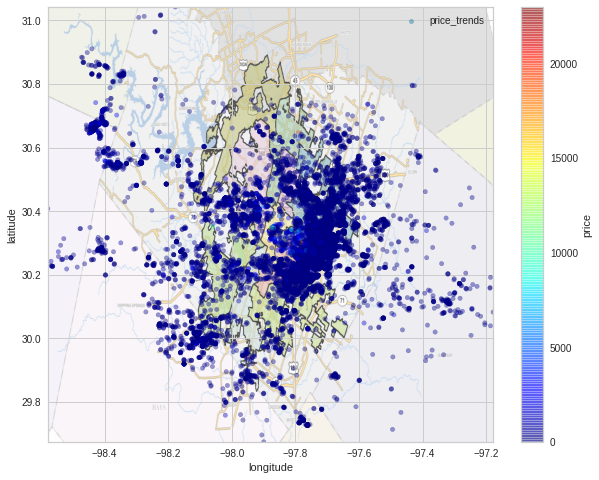

In [ ]:
plt.figure(figsize=(10,7))
img=imread('/content/gdrive/MyDrive/AUSTIN/city-council-districts.png')

plt.imshow(img,zorder=0,extent=[dfauslistings['longitude'].min(),dfauslistings['longitude'].max(),dfauslistings['latitude'].min(),dfauslistings['latitude'].max()])
ax = plt.gca()
dfauslistings.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()



In [ ]:
dfauslistings

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
dfws=dfauslistings[['bedrooms','minimum_nights','price']].dropna()


In [ ]:
dfws['pricepernight']=dfws['price']/dfws['minimum_nights']
dfws=dfws.dropna()


x= dfws.filter(['bedrooms','minimum_nights'])
x

y=dfws.filter(['pricepernight'])
